May 4: This notebook zooms into Mackenzie Canyon using IBCAO_V3_500m_RR.

* float64 x(x), actual_range: [-2904000.  2904000.], current shape = (11617,)
* float64 y(y), actual_range: [-2904000.  2904000.], current shape = (11617,)
* float32 z(y, x), actual_range: [-5573.01660156  5921.39746094], current shape = (11617, 11617)

Modified version of the ibcao.py module in make_bathymetry.ipynb.

In [5]:
%matplotlib inline

In [16]:
import  os
from    pyproj import Proj, Geod
import  scipy as sc, scipy.io
import  numpy as np
import  matplotlib.cm as cm
import  cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [7]:
ibcao_grid_name = 'IBCAO_V3_500m_RR.grd'
ibcao_grid_dir = '/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/grid'
ibcao_grid = os.path.join(ibcao_grid_dir, ibcao_grid_name)
ibcao_nc = scipy.io.netcdf_file (ibcao_grid)

x = ibcao_nc.variables['x'][:]
y = ibcao_nc.variables['y'][:]
z = ibcao_nc.variables['z'][:]

In [25]:
def Colormap():
    """
    return a discrete colormap and norm based on the official IBCAO colormap.

    usage:

    (cmap, norm) = self.Colormap ()
    cm = ax.pcolormesh (x, y, z, cmap = cmap, norm = norm)
    plt.colorbar (cm)

    """

    # loader based on: http://wiki.scipy.org/Cookbook/Matplotlib/Loading_a_colormap_dynamically and
    #   http://stackoverflow.com/questions/26559764/matplotlib-pcolormesh-discrete-colors
    
    COLORMAP = """\
    # downloaded from IBCAO homepage
    #Discrete color table for Ocean and continous for land in RGB for the Arctic bathymetry and topography
    -6000	18	10	59	-5000	18	10	59
    -5000	22	44	103	-4000	22	44	103
    -4000	22	88	135	-3000	22	88	135
    -3000	22	138	170	-2000	22	138	170
    -2000	22	154	184	-1500	22	154	184
    -1500	23	170	198	-1000	23	170	198
    -1000	23	186	212	-500	23	186	212
    -500	24	196	223	-250	24	196	223
    -250	25	206	234	-100	25	206	234
    -100	27	216	245	-75	27	216	245
    -75	38	223	241	-50	38	223	241
    -50	49	230	236	-25	49	230	236
    -25	105	242	233	-10	105	242	233
    -10	161	255	230	0	161	255	230
    0	40	158	38	25	44	176	42
    25	44	176	42	50	49	195	46
    50	49	195	46	75	145	208	80
    75	145	208	80	100	242	202	90
    100	242	202	90	200	227	170	48
    200	227	170	48	300	190	140	40
    300	190	140	40	400	151	109	31
    400	151	109	31	500	114	80	23
    500	114	80	23	600	95	63	12
    600	95	63	12	700	81	57	16
    700	81	57	16	800	114	97	71
    800	114	97	71	1000	105	105	105
    1000	105	105	105	1500	170	170	170
    1500	170	170	170	5000	200	200	200
    """

    cmap = np.empty ((0,4))
    c = 0

    for l in COLORMAP.split("\n"):
      l = l.strip()

      if len(l) == 0 or l[0] == '#':
        continue

      ls = np.array([float (v) for v in l.split ()])

      if ls.shape[0] < 8:
        continue

      c += 1
      cmap.resize (c, 4)
      cmap[c-1,:] = ls[:4]

    # add end spec
    c += 1
    cmap.resize (c, 4)
    cmap[c-1,:] = ls[4:]

    # normalize colors
    cmap[:,[1, 2, 3]] = cmap[:,[1, 2, 3]] / 255.

    cmap_out = cm.colors.ListedColormap (cmap[:,1:4], 'ibcao', c)
    norm     = cm.colors.BoundaryNorm (cmap[:,0], c)

    return (cmap_out, norm)

In [62]:
xmin = np.where(x==-1800000)[0][0]
xmax = np.where(x==-700000)[0][0]
ymin = np.where(x==1200000)[0][0]
ymax = np.where(x==2000000)[0][0]
xn = x[xmin:xmax]
yn = y[ymin:ymax]
zn = z[ymin:ymax, xmin:xmax]

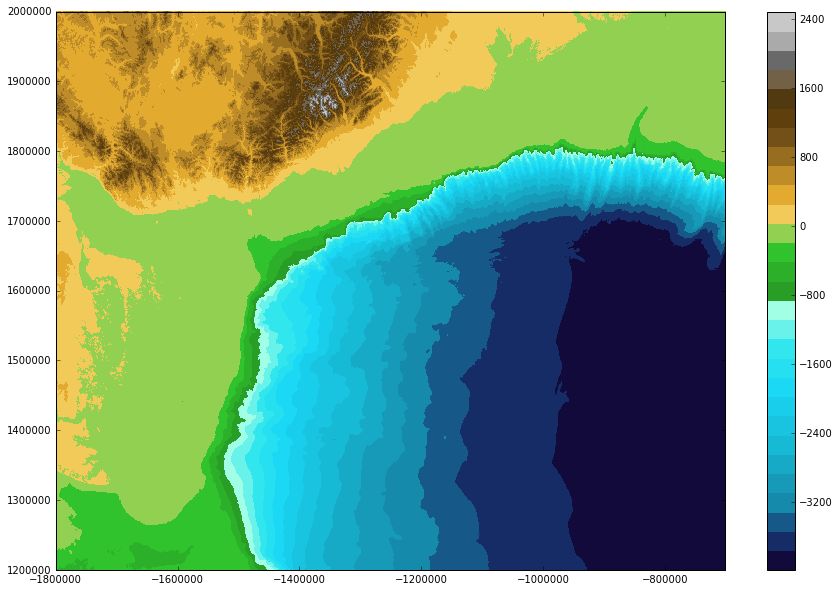

In [63]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
(cmap, norm) = Colormap()
c = ax.pcolorfast(xn,yn,zn,cmap=cmap)
fig.colorbar(c)

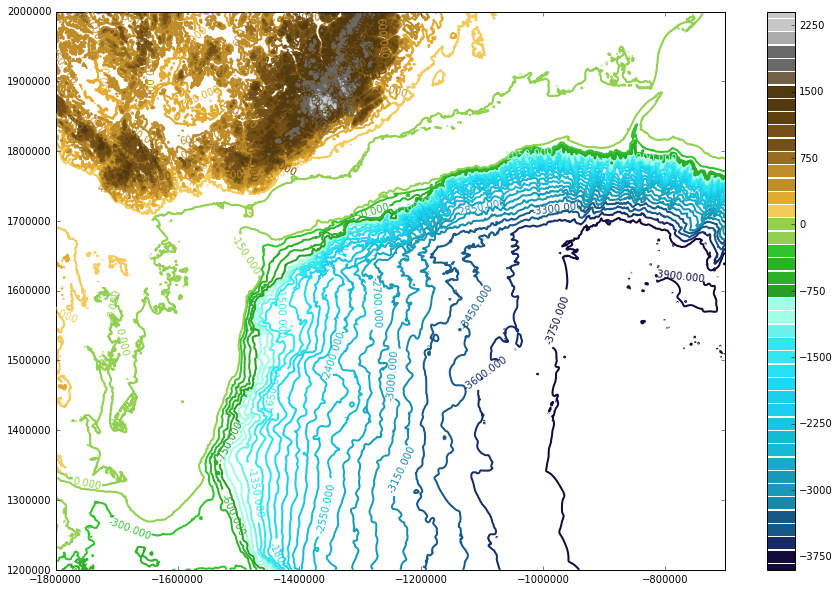

In [90]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
cs = ax.contour(xn,yn,zn,50,linewidths=2,cmap=cmap)
ax.clabel(cs, inline=1, fontsize=10)
cb = fig.colorbar(cs)
for line in cb.lines: 
   line.set_linewidth(12)